<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 6: Factorizacion QR</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

In [2]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
# !pip install threadpoolctl==3.2.0
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Tabla de Contenidos
1. [**Tutorial:** Ejemplo: Gram-Schmidt](#Ejemplo:-Gram-Schmidt)
2. [**Tutorial:** Ejemplo: Gram-Schmidt comparacion](#Ejemplo:-Gram-Schmidt-comparacion)
3. [**Tutorial:** Ejemplo: Algoritmo Householder](#Ejemplo:-Algoritmo-Householder)
4. [**Tutorial:** Algoritmo rotaciones de Givens](#Algoritmo-rotaciones-de-Givens) 


## Ejemplo: Gram Schmidt

\begin{align*}
A_1 &= \begin{bmatrix}
1/2 & 2 \\ 2 & 1 \end{bmatrix} \\
A_2 &= \begin{bmatrix}
1 & 1 & 2 \\ 1 & 0 & -2 \\ -1 & 2 & 3 \end{bmatrix}
\end{align*}

In [ ]:
def GramSchmidt_clasico(A):
    m = A.shape[0]; n = A.shape[1]
    R = np.zeros((n,n))
    Q = np.zeros((m,n))
    for j in range(0, n):
        vj = A[:,j]
        for i in range(0,j):
            R[i,j] = np.dot(Q[:,i],A[:,j])
            vj = vj - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(vj)
        Q[:,j] = (1.0/R[j,j])*vj
    return Q, R

A1 = np.array([[0.5 ,2.0],[2.0, 1.0]],dtype=np.float64)
A2 = np.array([[1 ,1, 2],[1, 0, -2],[-1,2,3]],dtype=np.float64)

Q1, R1 = GramSchmidt_clasico(A1)
Q2, R2 = GramSchmidt_clasico(A2)
print("Q1:\n", Q1)
print("||Q1^T Q1 - I||:\n", np.linalg.norm(Q1.T@Q1 - np.eye(2)), "\n")
print("Q2:\n", Q2)
print("||Q2^T Q2 - I||:\n", np.linalg.norm(Q2.T@Q2 - np.eye(3)), "\n")
print(1/np.sqrt(3.0)*np.array([1,1,-1]))
print(1/np.sqrt(42.0)*np.array([4,1,5]))
print(1/np.sqrt(14.0)*np.array([2,-3,-1]))

Q1:
 [[ 0.24253563  0.9701425 ]
 [ 0.9701425  -0.24253563]]
||Q1^T Q1 - I||:
 8.368033164341516e-17 

Q2:
 [[ 0.57735027  0.6172134   0.53452248]
 [ 0.57735027  0.15430335 -0.80178373]
 [-0.57735027  0.77151675 -0.26726124]]
||Q2^T Q2 - I||:
 4.563891378090311e-16 

[ 0.57735027  0.57735027 -0.57735027]
[0.6172134  0.15430335 0.77151675]
[ 0.53452248 -0.80178373 -0.26726124]


## Ejemplo: Gram Schmidt comparacion

Comparacion de algortimos de Gram-Schmidt clasico vs. Gram Schmidt modificado

Resolvemos la factorizacion QR de la siguiente matriz
\begin{equation*}
A = 
\begin{bmatrix}
1 & 1 & \ldots &1 \\
\vdots &\vdots & \ddots &\vdots \\
1 & 1 & \ldots &1
\end{bmatrix}
+\epsilon
I, \quad A\in \mathbb R^{10\times 10}
\end{equation*}

In [5]:

def GramSchmidt_modificado(A):
    m = A.shape[0]; n = A.shape[1];
    R = np.zeros((n,n));
    Q = np.zeros((m,n));
    v = np.zeros((m,n));
    for i in range(0, n):
        v[:,i] = A[:,i];
    for i in range(0, n):
        R[i,i] = np.linalg.norm(v[:,i]);
        Q[:,i] = (1.0/R[i,i])*v[:,i];
        for j in range(i,n):
            R[i,j] = np.dot(Q[:,i],v[:,j]);
            v[:,j]= v[:,j] - R[i,j]*Q[:,i];
    return Q, R

In [7]:
ep = 10**(-7)
A = np.ones((10,10)) + ep*np.eye((10));
#print(A)
Q, R = GramSchmidt_clasico(A)
print("*** Gram-Schmidt clasico.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(Q.T@ Q-np.eye(10)))
print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))

Q, R = GramSchmidt_modificado(A)
print("\n\n ")
print("*** Gram-Schmidt modified.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(np.dot(Q.T, Q)-np.eye(10)))

print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))

Q, R = np.linalg.qr(A)

print("\n\n ")
print("*** QR numpy.\n")
print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
print("    || Q.T@Q - I ||2 :", np.linalg.norm(np.dot(Q.T, Q)-np.eye(10)))

print("    || q1*q2 ||2     :", np.dot(Q[:,1], Q[:,2]))


*** Gram-Schmidt clasico.

    || A - QR ||2    : 9.019494489765868e-16
    || Q.T@Q - I ||2 : 0.3674695563835977
    || q1*q2 ||2     : -0.005948312637853892


 
*** Gram-Schmidt modified.

    || A - QR ||2    : 1.0295784775289034e-15
    || Q.T@Q - I ||2 : 7.830815093173928e-09
    || q1*q2 ||2     : -4.440892098500626e-16


 
*** QR numpy.

    || A - QR ||2    : 1.85775845048325e-15
    || Q.T@Q - I ||2 : 1.3847704561580154e-15
    || q1*q2 ||2     : 1.1102230246251565e-16


## Ejemplo: Algoritmo Householder


In [9]:
def house(x):
    '''
    Compute Householder vector
    Input: x \in \mathbb R^{m}
    Output: Householder vector v, with v[0]=1, and beta such that
            P = I-beta * v * v.T es orthogonal and Px = \|x\|*e_1
    '''
    m = x.size
    if m > 1:
        sigma = x[1:].dot(x[1:])
        v  = x.copy(); v[0] = 1.0
        if sigma == 0:
            beta = 0
        else:
            mu = np.sqrt(x[0]*x[0]+sigma)
            if x[0]<0:
                v[0] = x[0] - mu
            else:
                v[0] = -sigma/(x[0]+mu)
            beta = 2.0 * v[0]*v[0]/(sigma+v[0]**2)
            v = v / v[0]
        return v, beta
    else:
        return np.array([0.0]),0.0

def applyP(v, beta, x):
    # compute Px = (I - beta v v^T )x
    return x - beta * v.dot(x) * v

def Householder_qr(Ain):
    ''' 
    Compute QR decomposition using Householder
    update A in place with QR ... R is upper triangular (at and above diagonal)
    below the diagonal, A holds the "essential" parts of the Householder vectors.
    the essential part gets shorter because they are only applied to the remaining
    bottom right square of A
    Input : A, m\times n matrix
    Output: overwrite A
    '''
    A = Ain.copy()
    m,n = A.shape
    betas = np.empty(n)
    for j in range(n):
        # usando funcion house
        v, betas[j] = house(A[j:, j])
        A[j:,j:] -= betas[j] * np.outer(v, v.dot(A[j:,j:]))
        if j < m:
            A[j+1:,j] = v[1:m-j+1]
    
    R = np.triu(A)
    Q = fullQ_house(A, betas)
    return Q, R

def fullQ_house(A, betas):
    '''
    Take the "packed" Householder vectors stored in A's lower triangle,
    along with the respective \beta s and expand to a full Q matrix 
        (note, R still lives in A's upper triangle)
    '''
    m,n = A.shape
    Q = np.eye(n)
    for j in reversed(range(n)):
        v = A[j:,j].copy()
        v[0] = 1.0
        Q[j:,j:] = (np.eye(n-j) - betas[j] * np.outer(v,v)).dot(Q[j:,j:])
    return Q

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\h\AppData\Local\Temp\ipykernel_10792\296894522.py:2: SyntaxWarning: invalid escape sequence '\i'
  '''


In [10]:
def compare(M):
    # compare three QR decomposition: 1) Gram-Schmidt clasico, 2) Gram-Schmidt modificado, 3) Householder
    
    Q, R = GramSchmidt_clasico(M);
    
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("*** Gram-Schmidt clasico.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    
    
    Q, R = GramSchmidt_modificado(M);
    
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n ")
    print("*** Gram-Schmidt modified.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)

    Q, R = Householder_qr(M)
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n")
    print("*** Householder.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    

    Q, R = np.linalg.qr(M)
    errorQRLinf = np.linalg.norm(np.matmul(Q,R) - M, np.inf)
    errororthLinf = np.linalg.norm(np.matmul(Q.T,Q) - np.eye(Q.shape[0]), np.inf)
    
    print("\n\n")
    print("*** Householder numpy qr.\n")
    print("    ||Q*R-M ||_inf   : ",errorQRLinf)
    print("    ||Q'*Q - I||_inf : ", errororthLinf)
    pass

In [11]:
from scipy.linalg import hilbert
H = hilbert(16)
#print(H)
compare(H)

*** Gram-Schmidt clasico.

    ||Q*R-M ||_inf   :  2.220446049250313e-16
    ||Q'*Q - I||_inf :  8.9898295762051


 
*** Gram-Schmidt modified.

    ||Q*R-M ||_inf   :  3.677613769070831e-16
    ||Q'*Q - I||_inf :  1.686092924942988



*** Householder.

    ||Q*R-M ||_inf   :  5.134781488891349e-16
    ||Q'*Q - I||_inf :  2.1531783556771636e-15



*** Householder numpy qr.

    ||Q*R-M ||_inf   :  2.525757381022231e-15
    ||Q'*Q - I||_inf :  2.007928590585528e-15


## Algoritmo rotaciones de Givens

In [12]:
def Givens(a,b):
    if b == 0:
        c = 1; s = 0
        return c, s
    else:
        if abs(b) > abs(a):
            tau = -a/b; s = 1.0/np.sqrt(1.0+tau*tau); c = s*tau
            return c, s
        else:
            tau = -b/a; c = 1.0/np.sqrt(1.0+tau*tau); s = c*tau
            return c, s

def computeGx(i,k,x):
    y = x.copy()
    (c, s) = Givens(x[i],x[k])  
    print(c,s)
    y[i] = c*x[i] - s*x[k]
    y[k] = s*x[i] + c*x[k]
    return y

def Givens_qr(Ain):
    '''
    Compute QR decomposition of A m\times n
    Input :
    Output:
    '''
    A = Ain.copy()
    m, n = A.shape
    for j in range(n):
        for i in reversed(range(j+1,m)):
            (c, s) = Givens(A[i-1,j],A[i,j])  
            A[[i-1,i],j:] = np.array([[c,-s],[s,c]])@A[[i-1,i],j:]
            plt.spy(A,precision=1e-14)
            plt.show()
    return A
    
    

0.4472135954999579 -0.8944271909999159
-0.4472135954999579 0.8944271909999159


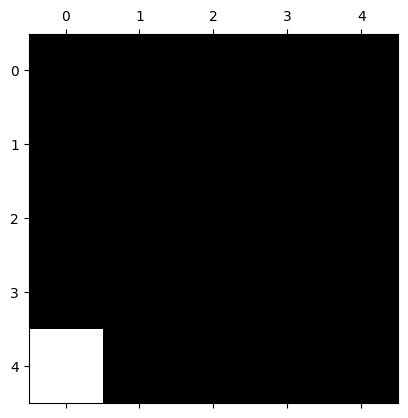

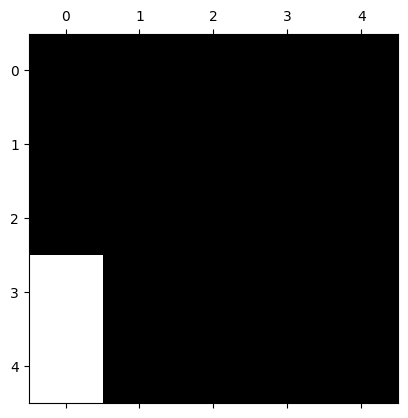

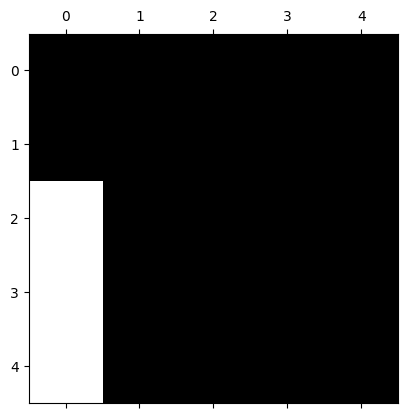

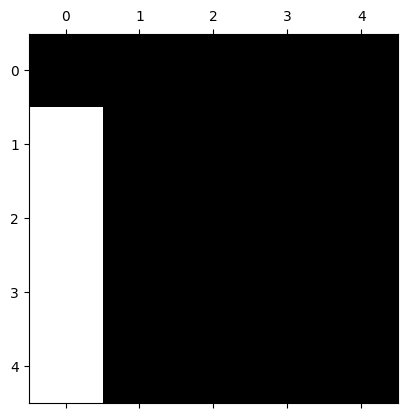

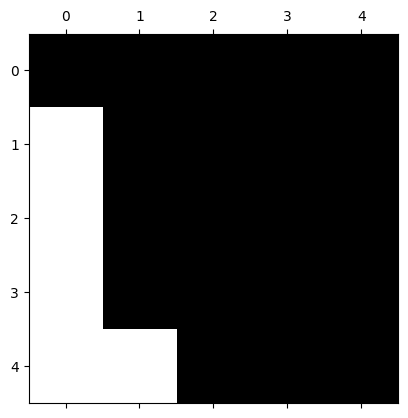

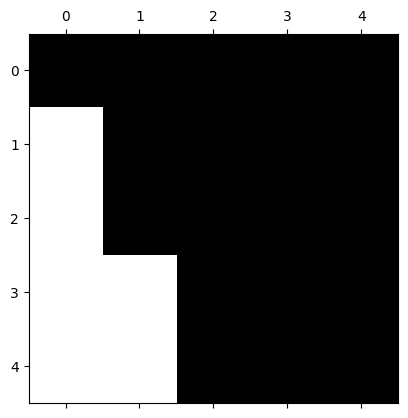

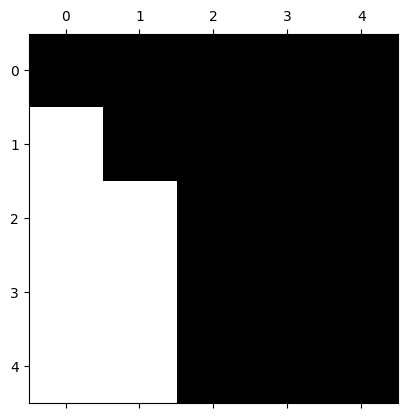

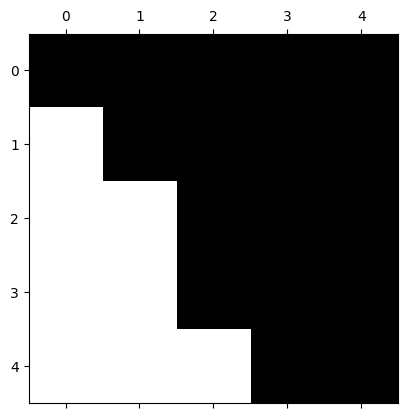

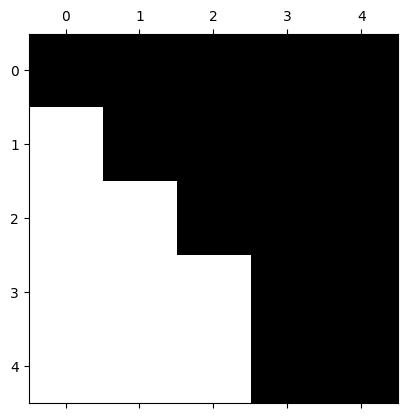

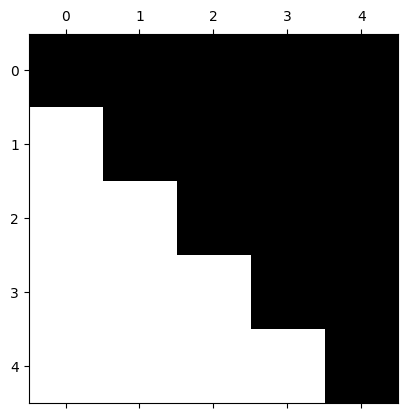

In [13]:
## ejemplo
np.set_printoptions(precision=6)
x = np.array([1.0,2.0,3.0,4.0])
print(1.0/np.sqrt(5.0), -2.0/np.sqrt(5.0))
computeGx(1,3,x)
A = hilbert(5)
newA = Givens_qr(A)
